In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd


data = load_breast_cancer()
X=data.data
y=data.target

df=pd.DataFrame(X, columns= data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# 모델 평가를 위해 훈련 데이터와 테스트 데이터 분할

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.3, random_state=42)

In [4]:
# 훈련 데이터 활용 로지스틱 회귀모형 적합

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [11]:
# .predict_proba: 예측 확률을 출력하는 옵션

y_prob_org = model.predict_proba(X_test)
print(pd.DataFrame(y_prob_org[:5].round(3)))

       0      1
0  0.139  0.861
1  1.000  0.000
2  0.998  0.002
3  0.001  0.999
4  0.000  1.000


In [10]:
# .predict: 예측 값을 출력하는 옵션

y_pred = model.predict(X_test)
print(pd.DataFrame(y_pred, columns=['pred']).head())

   pred
0     1
1     0
2     0
3     1
4     1


In [ ]:
# 판단 기준은 임곗갓 0.5 이상인 경우

y_pred_ths = (model.predict_proba(X_test)[:, 1] >= 0.5).astype(int) # 2열에 대한 즉 1에 대한 확률만 추출 후 확률 0.5 이상이면 True(1로 분류) False(0으로 분류)

# 값이 동일한지 확인
import numpy as np

print('동일 한가요?', np.array_equal(y_pred_ths, y_pred))

동일 한가요? True


AttributeError: module 'matplotlib' has no attribute 'show'

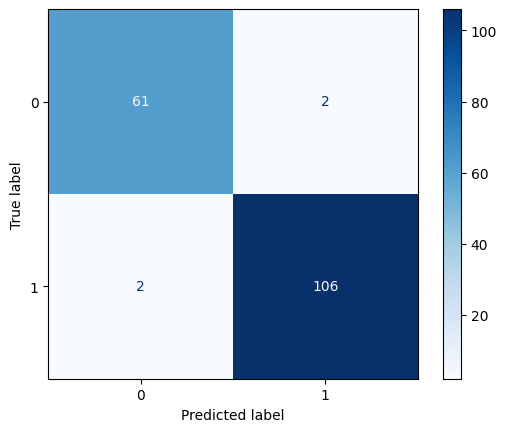

In [23]:
# 혼동 행렬

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib as plt

cm = confusion_matrix(y_test, y_pred)
isp = ConfusionMatrixDisplay(confusion_matrix=cm)
isp.plot(cmap=plt.cm.Blues)
plt.show();

#### 혼동행렬

In [ ]:
# 평가지표

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy: {accuracy:.2f}")
print(f"precision: {precision:.2f}")
print(f"recall: {recall:.2f}")
print(f"f1_score: {f1:.2f}")

accuracy: 0.98
precision: 0.98
recall: 0.98
f1_score: 0.98


In [ ]:
# 긍정 클래스(보통 1)인 경우를 구체적으로 표시할 경우 pos_label을 추가할 수 있음

precision2 = precision_score(y_test, y_pred, pos_label= 1)
recall2 = recall_score(y_test, y_pred, pos_label= 1)
f12 = f1_score(y_test, y_pred, pos_label=1)

print(precision2)
print(recall2)
print(f12)


0.9814814814814815
0.9814814814814815
0.9814814814814815


In [ ]:
# average='macro'는 클래스 불균형이 있어도 모든 클래스를 동일 비중으로 평가하고 싶을 때 유용

precision3 = precision_score(y_test, y_pred, pos_label = 1, average='macro')
recall3 = recall_score(y_test, y_pred, pos_label=1, average= 'macro')
f13 = f1_score(y_test, y_pred, pos_label=1, average='macro')

print(precision3)
print(recall3)
print(f13)


0.9748677248677249
0.9748677248677249
0.9748677248677249


### ROC
- 다양한 임곗값에서의 TPR, FPR를 시각적으로 나타낸 그래프

In [32]:
y_pred_ths1 = (model.predict_proba(X_test)[:, 1]>=0.1).astype(int)
y_pred_ths2 = (model.predict_proba(X_test)[:, 1]>=0.9).astype(int)
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred_ths1)
cm2 = confusion_matrix(y_test, y_pred_ths2)

print('임곗값 0.1일 때')
print(cm1)
print('임곗값 0.9일 때')
print(cm2)

임곗값 0.1일 때
[[ 58   5]
 [  2 106]]
임곗값 0.9일 때
[[63  0]
 [12 96]]


In [34]:
# AUC 계산

from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_prob)

print(auc_score)

0.9976484420928865


#### 다중분류

In [35]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [36]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
# 훈련

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# 모델 성능 평가
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [40]:
# 혼동 행렬을 바탕으로 한 지표 계산

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro') #micro 가능
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(accuracy)
print(precision)
print(recall)
print(f1)

0.9777777777777777
0.9761904761904763
0.9814814814814815
0.9781305114638448


In [43]:
# 다중 분류 문제 ROC 커브

from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)
auc1, auc2, auc3 = roc_auc_score(y_test, y_prob, multi_class='ovr', average=None)
print(auc1)
print(auc2)
print(auc3)


1.0
0.9979423868312758
0.9975961538461539


#### 분류 알고리즘

In [44]:
# 예제 데이터

train = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/s13_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/s13_test.csv')
print(train.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         A       20.510         27.81          134.40     1319.0   
1         B       12.060         18.90           76.66      445.3   
2         B        9.742         19.12           61.93      289.7   
3         A       12.450         15.70           82.57      477.1   
4         A       14.250         22.15           96.42      645.7   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.09159           0.10740        0.155400             0.083400   
1          0.08386           0.05794        0.007510             0.008488   
2          0.10750           0.08333        0.008934             0.019670   
3          0.12780           0.17000        0.157800             0.080890   
4          0.10490           0.20080        0.213500             0.086530   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1448  ...         24.47          37.38 

In [46]:
# 데이터 나누기

train_X = train.drop(['diagnosis'], axis=1)
train_y = train['diagnosis']

test_X = test.drop(['diagnosis'], axis=1)
test_y = test['diagnosis']

print(train_y.head(3))

0    A
1    B
2    B
Name: diagnosis, dtype: object


In [47]:
# 타겟 변수 object knn 모형 구축

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(train_X, train_y)
KNeighborsClassifier()

KNeighborsClassifier()

In [48]:
# 모델 성능 확인
y_pred = model.predict(test_X)
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.80      0.89        10
           B       0.91      1.00      0.95        20

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
# f1 score 출력 (잘못된 예시)
from sklearn.metrics import f1_score

f1 = f1_score(test_y, y_pred)
print(f1)
# 클래스 A,B중 어떤 클래스가 긍정 클래스인지 값이 명확하지 않기 때문

ValueError: pos_label=1 is not a valid label. It should be one of ['A', 'B']

In [50]:
# f1 score 출력
from sklearn.metrics import f1_score

f1 = f1_score(test_y, y_pred, pos_label='A')

print(f1)

0.888888888888889


In [52]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [53]:
# gridsearchCV 적용
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(
    model,
    param_grid,
    cv= 3,
    scoring='f1'
)

grid_search.fit(train_X, train_y)

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/utils/_param_validation.

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]}, scoring='f1')

In [ ]:

# best score가 nan인 이유: 타겟 값 A,B 중 뭐가 긍정인지 모름
print(grid_search.best_params_)
print(grid_search.best_score_)
display(pd.DataFrame(grid_search.cv_results_))

{'n_neighbors': 3}
nan


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002831,0.002127,0.005912,0.003288,3,{'n_neighbors': 3},NaN,NaN,NaN,NaN,NaN,1
1,0.001222,0.000447,0.002292,0.000725,5,{'n_neighbors': 5},NaN,NaN,NaN,NaN,NaN,1
2,0.000870,0.000044,0.002178,0.000447,7,{'n_neighbors': 7},NaN,NaN,NaN,NaN,NaN,1
3,0.000863,0.000036,0.001666,0.000035,9,{'n_neighbors': 9},NaN,NaN,NaN,NaN,NaN,1
4,0.000734,0.000011,0.001689,0.000111,11,{'n_neighbors': 11},NaN,NaN,NaN,NaN,NaN,1


In [57]:
# 긍정 클래스 지정
train_y2 = train_y.map({'A':1, 'B':0})
test_y = test_y.map({'A':1, 'B': 0})

# LabelEncodr() 활용 - 알파벳 순서대로 수치 부여해서 긍정 클래스를 잘못 부여 가능성 존재

#### 분류 실습

In [58]:
# 예제 데이터 새성

train = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/wisconsin_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/YoungjinBD/data/main/wisconsin_test.csv')

In [77]:
# 훈련 데이터 / 테스트 데이터 X, y 구분

train_X = train.drop(['diagnosis'], axis =1)
train_y = train['diagnosis']

test_X = test.drop(['diagnosis'], axis =1 )
test_y = test['diagnosis']

In [78]:
# 타겟 변수 Label encoding 적용 / 악성(M)이 긍정 클래스 1 적용 / 알파벳 순서대로 이코딩 됨 B=0 M=1

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

train_y = labelencoder.fit_transform(train_y)
test_y = labelencoder.transform(test_y)

In [79]:
# 파이프라인 / ColumnTransformer() 활용 데이터 전처리

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

# 수치형 컬럼 선택
num_columns = train_X.select_dtypes('number').columns.tolist()

num_preprocess = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.8, svd_solver='full')
)

preprocess = ColumnTransformer(
    [("num", num_preprocess, num_columns)]
)

In [80]:
# k-nearest Neighbors(KNN)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

full_pipe = Pipeline(
    [
    ("preprocess", preprocess),
    ('classifier', KNeighborsClassifier())
    ]
)

In [82]:
# 별칭 확인

KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [83]:
knn_param = {'classifier__n_neighbors': np.arange(5, 10 ,1)}

In [84]:
knn_search = GridSearchCV(estimator= full_pipe,
                          param_grid=knn_param,
                          cv=3,
                          scoring='f1_macro')
knn_search.fit(train_X, train_y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'concave_points_se',
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': array([5, 6, 7, 8, 9])},
             scoring='f1_macro')

In [85]:
print(knn_search.best_params_)
print(knn_search.best_score_)

{'classifier__n_neighbors': 7}
0.9543004598576802


In [86]:
# 테스트 데이터 모형 성능 평가

from sklearn.metrics import f1_score

knn_pred = knn_search.predict(test_X)

print(f1_score(test_y, knn_pred))

0.9586776859504132


In [91]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier

full_pipe = Pipeline(
    [
        ('preprocess', preprocess),
        ('classifier', DecisionTreeClassifier())
    ]
)

In [92]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [94]:
decisiontree_params = {'classifier__ccp_alpha': np.arange(0.01, 0.3, 0.05)}
decisiontree_search = GridSearchCV(estimator=full_pipe,
                                   param_grid=decisiontree_params,
                                   cv=5,
                                   scoring='roc_auc')
decisiontree_search.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__ccp_alpha': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26])},
             scoring='roc_auc')

In [97]:
print('best parmas', decisiontree_search.best_params_)
print('교차검증 AUC', decisiontree_search.best_score_)

best parmas {'classifier__ccp_alpha': 0.01}
교차검증 AUC 0.9363136758151537


In [ ]:
# 모델 성능 평가

from sklearn.metrics import roc_auc_score

y_prob = decisiontree_search.predict_proba(test_X)[:, 1]
auc_score = roc_auc_score(test_y, y_prob)
print(auc_score)

0.9617871840094062


In [100]:
test_y

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

#### 앙상블 학습

In [102]:
from sklearn.ensemble import BaggingClassifier

full_pipe = Pipeline(
    [
        ("preprocess", preprocess),
        ("classifier", BaggingClassifier())
    ]
)

In [103]:
BaggingClassifier().get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [113]:
Bagging_params = {'classifier__n_estimators': np.arange(10, 100, 20)}
Bagging_search = GridSearchCV(
    estimator= full_pipe,
    param_grid = Bagging_params,
    cv= 5,
    scoring='f1_macro'
)

Bagging_search.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'concave_points_se',
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('classifier', BaggingClassifier())]),
             param_grid={'classifier__n_estimators': array([10, 30, 50, 70, 90])},
             scoring='f1_macro')

In [114]:
print(Bagging_search.best_params_)
print(Bagging_search.best_score_)

{'classifier__n_estimators': 90}
0.9598538475479238


In [115]:
# 테스트 데이터 모형 성능 평가
from sklearn.metrics import f1_score

bag_pred = Bagging_search.predict(test_X)
print(f1_score(test_y, bag_pred))

0.9206349206349206


#### Random forest

In [126]:
from sklearn.ensemble import RandomForestClassifier

full_pipe = Pipeline(
    [
        ("preprocess", preprocess),
        ("classifier", RandomForestClassifier())
    ]
)

In [127]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [129]:
RandomForest_param = {'classifier__n_estimators': np.arange(100, 500, 100)}
RandomForest_search = GridSearchCV(estimator=full_pipe,
                                   param_grid=RandomForest_param,
                                   cv=3,
                                   scoring='accuracy')

RandomForest_search.fit(train_X, train_y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__n_estimators': array([100, 200, 300, 400])},
             scoring='accuracy')

In [131]:
print(RandomForest_search.best_params_)
print(RandomForest_search.best_score_)

{'classifier__n_estimators': 200}
0.9598617756512494


In [138]:
# 모형 성능 평가

from sklearn.metrics import accuracy_score

rf_pred = RandomForest_search.predict(test_X)
print(accuracy_score(test_y, rf_pred))

0.9415204678362573


In [139]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

full_pipe = Pipeline(
    [
        ("preprocess", preprocess),
        ('classifier', GradientBoostingClassifier())
    ]
)

In [141]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [144]:
GradientBoosting_param = {'classifier__learning_rate': np.arange(0.1 ,0.3, 0.05)}
GradientBoosting_search = GridSearchCV(estimator= full_pipe,
                                       param_grid=GradientBoosting_param,
                                       cv=5,
                                       scoring='f1_macro')

GradientBoosting_search.fit(train_X, train_y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             param_grid={'classifier__learning_rate': array([0.1 , 0.15, 0.2 , 0.25])},
             scoring='f1_macro')

In [145]:
print(GradientBoosting_search.best_params_)
print(GradientBoosting_search.best_score_)

{'classifier__learning_rate': 0.1}
0.9651550087011331


In [146]:
from sklearn.metrics import f1_score
gb_pred = GradientBoosting_search.predict(test_X)
print(f1_score(test_y, gb_pred))

0.9302325581395349


In [ ]:
#### 고급분류기법 (SVM)

from sklearn.svm import SVC

full_pipe = Pipeline(
    [
        ('preprocess', preprocess),
        ('regressor', SVC(probability=True))
    ]
)

# svc에서 .predict_proba()를 사용하기 위해서는 probability=True 설정

In [148]:
SVC(probability=True).get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [150]:
SVC_param = {'regressor__C': np.arange(1, 100 ,20)}
SVC_search = GridSearchCV(
    estimator= full_pipe,
    param_grid=SVC_param,
    cv=3,
    scoring='roc_auc'
)

SVC_search.fit(train_X, train_y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['radius_mean',
                                                                          'texture_mean',
                                                                          'perimeter_mean',
                                                                          'area_mean',
                                                                          'smoothness_mean',
                                                                          'compactness_mean',
                                                                          'concavity_mean',
                                                                          'concave_points_mean',
                                                                          'symmetry_mean',...
                                                                          'concave_points_se',
                                                                          'symmetry_se',
                                                                          'fractal_dimension_se',
                                                                          'radius_worst',
                                                                          'texture_worst',
                                                                          'perimeter_worst',
                                                                          'area_worst',
                                                                          'smoothness_worst',
                                                                          'compactness_worst',
                                                                          'concavity_worst',
                                                                          'concave_points_worst',
                                                                          'symmetry_worst',
                                                                          'fractal_dimension_worst'])])),
                                       ('regressor', SVC(probability=True))]),
             param_grid={'regressor__C': array([ 1, 21, 41, 61, 81])},
             scoring='roc_auc')

In [151]:
print(SVC_search.best_params_)
print(SVC_search.best_score_)

{'regressor__C': 1}
0.9904450454880748


In [154]:
from sklearn.metrics import roc_auc_score

y_prob = SVC_search.predict_proba(test_X)[:, 1]
auc_score = roc_auc_score(test_y, y_prob)
print(auc_score)

0.9941211052322163


#### 모범 답안

In [156]:
# 데이터

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [158]:
# 데이터 분할

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df.drop(columns='target'), df['target'], test_size=0.3, random_state=42)

In [159]:
# 데이터 탐색

print(train_X.info())
print(test_X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 149 to 102
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              398 non-null    float64
 1   mean texture             398 non-null    float64
 2   mean perimeter           398 non-null    float64
 3   mean area                398 non-null    float64
 4   mean smoothness          398 non-null    float64
 5   mean compactness         398 non-null    float64
 6   mean concavity           398 non-null    float64
 7   mean concave points      398 non-null    float64
 8   mean symmetry            398 non-null    float64
 9   mean fractal dimension   398 non-null    float64
 10  radius error             398 non-null    float64
 11  texture error            398 non-null    float64
 12  perimeter error          398 non-null    float64
 13  area error               398 non-null    float64
 14  smoothness error         398 

In [160]:
# 데이터 분할

from sklearn.model_selection import train_test_split

train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.3, random_state= 1)

print(train_X.shape, valid_X.shape, train_y.shape, valid_y.shape)

(278, 30) (120, 30) (278,) (120,)


In [161]:
# 데이터 전처리
# 범주형 원핫인코딩 수치형 결측치 대치

cat_columns = train_X.select_dtypes('object').columns.to_list()
num_columns = train_X.select_dtypes('number').columns.to_list()

In [165]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [168]:
train_X_categorical_encoded = onehotencoder.fit_transform(train_X[cat_columns])
valid_X_categorical_encoded = onehotencoder.transform(valid_X[cat_columns])
test_X_categorical_encoded = onehotencoder.transform(test_X[cat_columns])

train_X_preprocessed = np.concatenate([train_X[num_columns], train_X_categorical_encoded], axis=1)
valid_X_preprocessed = np.concatenate([valid_X[num_columns], valid_X_categorical_encoded], axis=1)
test_X_preprocessed = np.concatenate([test_X[num_columns], test_X_categorical_encoded], axis=1)

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [169]:
# 모델 적합

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(train_X_preprocessed, train_y)

RandomForestClassifier(random_state=1)

In [171]:
# 성능 검증 (f1 score)

from sklearn.metrics import f1_score

pred_val = rf.predict(valid_X_preprocessed)
f1_score(valid_y, pred_val, average='macro')

0.9475371611774992

In [172]:
# 테스트 데이터 예측

test_pred = rf.predict(test_X_preprocessed)
test_pred = pd.DataFrame(test_pred, columns=['pred'])

In [173]:
# result.csv 저장
test_pred.to_csv('result.csv', index = False)

##### k-fold 교차검증 진행

In [174]:
# 학습 데이터 검증 데이터 합치기

train_X_full = np.concatenate([train_X_preprocessed, valid_X_preprocessed], axis=0)
train_y_full = np.concatenate([train_y, valid_y], axis=0)

In [176]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [180]:
# GridSearchCV()를 통해 라이퍼파라미터 튜닝 진행

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [10, 20, 30],
              'min_samples_split': [2, 5, 10]}

rf= RandomForestClassifier(random_state=1)

rf_search = GridSearchCV(estimator= rf,
                         param_grid = param_grid,
                         cv = 3,
                         scoring = 'f1_macro')

rf_search.fit(train_X_full, train_y_full)

print(rf_search.best_score_)

0.9460649058820315


In [181]:
# 최종 예측 결과 수행

test_pred2 = rf_search.predict(test_X_preprocessed)
test_pred2 = pd.DataFrame(test_pred2, columns=['pred'])

test_pred2.to_csv('result.csv', index=False)

In [182]:
# columnTransformer pipeline 활용 방법

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target']= y

In [183]:
# 테스트 데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'), df['target'], test_size=0.3, random_state=42)



In [186]:
# 파이프라인과 columnTransformer() 활용 데이터 전처리 진행

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

num_columns = train_X.select_dtypes('number').columns.tolist()

num_preprocess = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.8, svd_solver='full')
)

preprocess = ColumnTransformer(
    [("num", num_preprocess, num_columns)]
)

In [192]:
from sklearn.ensemble import RandomForestClassifier

full_pipe = Pipeline(
    [
    ("preprocess", preprocess),
    ("classifier", RandomForestClassifier())
    ]
)

full_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.8,
                                                                       svd_solver='full'))]),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                                                   'mean symmetry',
                                                   'mean fractal dimension',
                                                   'radius error',
                                                   '...
                                                   'perimeter error',
                                                   'area error',
                                                   'smoothness error',
                                                   'compactness error',
                                                   'concavity error',
                                                   'concave points error',
                                                   'symmetry error',
                                                   'fractal dimension error',
                                                   'worst radius',
                                                   'worst texture',
                                                   'worst perimeter',
                                                   'worst area',
                                                   'worst smoothness',
                                                   'worst compactness',
                                                   'worst concavity',
                                                   'worst concave points',
                                                   'worst symmetry',
                                                   'worst fractal '
                                                   'dimension'])])),
                ('classifier', RandomForestClassifier())])

In [193]:
test_pred3 = full_pipe.predict(X_test)
test_pred3 = pd.DataFrame(test_pred3, columns=['pred'])

In [194]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [199]:
# 하이퍼 파라미터 튜닝

from sklearn.ensemble import RandomForestClassifier

full_pipe = Pipeline(
    [
        ("preprocess", preprocess),
        ("classifier", RandomForestClassifier())
    ]
)

RandomForest_param = {'classifier__n_estimators': np.arange(100, 500, 100)}

RandomForest_search = GridSearchCV(
    estimator= full_pipe,
    param_grid = RandomForest_param,
    cv= 3,
    scoring= 'f1_macro'
)

RandomForest_search.fit(train_X, train_y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.8,
                                                                                              svd_solver='full'))]),
                                                                         ['mean '
                                                                          'radius',
                                                                          'mean '
                                                                          'texture',
                                                                          'mean '
                                                                          'perimeter',
                                                                          'mean '
                                                                          'area',
                                                                          'mean '
                                                                          'smoothness',
                                                                          'mean '
                                                                          'compactness',
                                                                          'mean '
                                                                          'concavity',
                                                                          'mean '
                                                                          'concave '
                                                                          'points',
                                                                          'mean '
                                                                          '...
                                                                          'fractal '
                                                                          'dimension '
                                                                          'error',
                                                                          'worst '
                                                                          'radius',
                                                                          'worst '
                                                                          'texture',
                                                                          'worst '
                                                                          'perimeter',
                                                                          'worst '
                                                                          'area',
                                                                          'worst '
                                                                          'smoothness',
                                                                          'worst '
                                                                          'compactness',
                                                                          'worst '
                                                                          'concavity',
                                                                          'worst '
                                                                          'concave '
                                                                          'points',
                          

In [200]:
print(RandomForest_search.best_params_)
print(RandomForest_search.best_score_)

{'classifier__n_estimators': 300}
0.9377633428412143


In [201]:
# 최종 결과 저장

test_pred4 = RandomForest_search.predict(test_X)
test_pred4 = pd.DataFrame(test_pred4, columns=['pred'])
test_pred4.to_csv('result.csv', index=False)